In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df1=pd.read_excel("财政部-中国国债收益率曲线历史数据2016年01月01日—2016年12月30日.xlsx")

D:\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df2=pd.read_excel("17年.xlsx")

In [4]:
df3=pd.read_excel("18年.xlsx")
df4=pd.read_excel("19年.xlsx")
df5=pd.read_excel("20年.xlsx")
df6=pd.read_excel("21年.xlsx")
df7=pd.read_excel("21年.2.xlsx")

In [5]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7]).reset_index().drop("index",1).sort_values("日期")

In [6]:
df["无风险利率"]=(df["5年"]+2.65)/2

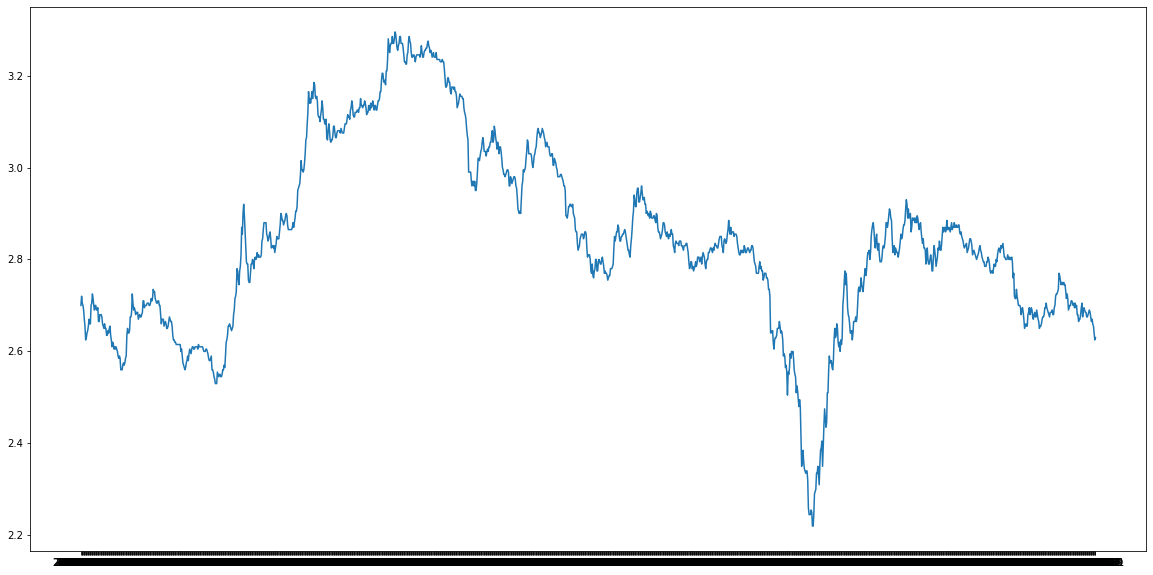

In [7]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(df['日期'],df['无风险利率'])
plt.show()

In [8]:
CSI300=pd.read_csv("../Shanghai Shenzhen CSI 300 Historical Data.csv")

In [9]:
SSEC=pd.read_csv("../Shanghai Composite Historical Data (1).csv")

In [10]:
CSI300["日期"]=CSI300["Date"].astype('datetime64[D]')

In [11]:
SSEC["日期"]=SSEC["Date"].astype('datetime64[D]')

In [12]:
df["日期"]=df["日期"].astype('datetime64[D]')

In [13]:
CSI300.sort_values("日期")

,Date,Price,Open,High,Low,Vol.,Change %,日期
1460,01/04/2016,"3,469.07","3,725.86","3,726.24","3,468.95",115.37K,-7.02%,2016-01-04
1459,01/05/2016,"3,478.78","3,382.18","3,518.22","3,377.28",162.12K,0.28%,2016-01-05
1458,01/06/2016,"3,539.81","3,482.41","3,543.74","3,468.47",145.97K,1.75%,2016-01-06
1457,01/07/2016,"3,294.38","3,481.15","3,481.15","3,284.74",44.10K,-6.93%,2016-01-07
1456,01/08/2016,"3,361.56","3,371.87","3,418.85","3,237.93",185.96K,2.04%,2016-01-08
...,...,...,...,...,...,...,...,...
4,12/27/2021,"4,919.32","4,918.15","4,939.69","4,894.16",124.10K,-0.04%,2021-12-27
3,12/28/2021,"4,955.96","4,923.69","4,959.15","4,913.60",130.46K,0.74%,2021-12-28
2,12/29/2021,"4,883.48","4,958.65","4,958.65","4,883.48",113.59K,-1.46%,2021-12-29
1,12/30/2021,"4,921.51","4,882.16","4,940.18","4,878.65",121.62K,0.78%,2021-12-30


In [14]:
CSI300["Price"]=CSI300["Price"].str.replace(",","")

In [15]:
CSI300["Price"]=CSI300["Price"].astype(float)

In [16]:
CSI300["Change"]=CSI300["Change %"].str.replace("%","").astype(float)

In [17]:
CSI=CSI300[["日期","Price","Change"]].sort_values("日期")

In [18]:
SSEC["Price"]=SSEC["Price"].str.replace(",","").astype(float)
SSEC["Change"]=SSEC["Change %"].str.replace("%","").astype(float)
ssec=SSEC[["日期","Price","Change"]].sort_values("日期")

In [19]:
CSI=CSI.rename(columns={"Price":"CSI_pri","Change":"CSI_ch"})

In [20]:
ssec=ssec.rename(columns={"Price":"ssec_pri","Change":"ssec_ch"})

In [21]:
indexes=pd.concat([CSI.set_index("日期"),ssec.set_index("日期")],axis=1)

In [22]:
#无风险利率的计算规则：中国银行五年期定期存款利率+5年期国债取平均
norisk=df[["日期","无风险利率"]]

In [23]:
indexes

,CSI_pri,CSI_ch,ssec_pri,ssec_ch
日期,,,,
2016-01-04,3469.07,-7.02,3296.26,-6.86
2016-01-05,3478.78,0.28,3287.71,-0.26
2016-01-06,3539.81,1.75,3361.84,2.25
2016-01-07,3294.38,-6.93,3125.00,-7.04
2016-01-08,3361.56,2.04,3186.41,1.97
...,...,...,...,...
2021-12-27,4919.32,-0.04,3615.97,-0.06
2021-12-28,4955.96,0.74,3630.11,0.39
2021-12-29,4883.48,-1.46,3597.00,-0.91


In [24]:
indexes["组合大盘指数"]=(indexes["CSI_pri"]*2+indexes["ssec_pri"]*4)/6

In [25]:
indexes[["组合大盘指数"]]

,组合大盘指数
日期,
2016-01-04,3353.863333
2016-01-05,3351.400000
2016-01-06,3421.163333
2016-01-07,3181.460000
2016-01-08,3244.793333
...,...
2021-12-27,4050.420000
2021-12-28,4072.060000
2021-12-29,4025.826667


In [26]:
rm_rf=pd.concat([df.set_index("日期")[["无风险利率"]],indexes[["组合大盘指数"]]],axis=1)

In [27]:
#上下两个值的平均值进行填充
rm_rf=rm_rf.fillna(rm_rf.interpolate())
#在此详细介绍下interpolate函数的参数：'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline', 'barycentric', 'polynomial'

In [28]:
rm_rf["Rf"]=rm_rf["无风险利率"]/360

In [29]:
rm_rf["Rm"]=rm_rf["组合大盘指数"].pct_change(1)*100

In [32]:
cz1=pd.read_excel("C:/Users/Administrator/Desktop/fintech final project/stock_chosen/成长/002415.SZ.xlsx")
cz2=pd.read_excel("C:/Users/Administrator/Desktop/fintech final project/stock_chosen/成长/002475.SZ.xlsx")
cz3=pd.read_excel("C:/Users/Administrator/Desktop/fintech final project/stock_chosen/成长/601012.SH.xlsx")

In [33]:
s002415=cz1[["日期","收盘价(元)","涨跌幅(%)"]].drop_duplicates("日期").set_index("日期").rename(columns={"收盘价(元)":"002415_price","涨跌幅(%)":"002415_r"})

In [34]:
s002475=cz2[["日期","收盘价(元)","涨跌幅(%)"]].drop_duplicates("日期").set_index("日期").rename(columns={"收盘价(元)":"002475_price","涨跌幅(%)":"002475_r"})

In [35]:
s601012=cz3[["日期","收盘价(元)","涨跌幅(%)"]].drop_duplicates("日期").set_index("日期").rename(columns={"收盘价(元)":"601012_price","涨跌幅(%)":"601012_r"})

In [36]:
cz_all=pd.concat([s002415,s002475,s601012],axis=1).dropna()

In [37]:
wd1=pd.read_excel("C:/Users/Administrator/Desktop/fintech final project/stock_chosen/稳定/600009.SH.xlsx")
wd2=pd.read_excel("C:/Users/Administrator/Desktop/fintech final project/stock_chosen/稳定/601390.SH.xlsx")
wd3=pd.read_excel("C:/Users/Administrator/Desktop/fintech final project/stock_chosen/稳定/601668.SH.xlsx")

In [38]:
s600009=wd1[["日期","收盘价(元)","涨跌幅(%)"]].drop_duplicates("日期").set_index("日期").rename(columns={"收盘价(元)":"600009_price","涨跌幅(%)":"600009_r"})

In [39]:
s601390=wd2[["日期","收盘价(元)","涨跌幅(%)"]].drop_duplicates("日期").set_index("日期").rename(columns={"收盘价(元)":"601390_price","涨跌幅(%)":"601390_r"})

In [40]:
s601668=wd3[["日期","收盘价(元)","涨跌幅(%)"]].drop_duplicates("日期").set_index("日期").rename(columns={"收盘价(元)":"601668_price","涨跌幅(%)":"601668_r"})

In [41]:
wd_all=pd.concat([s600009,s601390,s601668],axis=1).dropna()

In [42]:
gu_all=pd.concat([cz_all,wd_all],axis=1)

方案一：看个股情况

In [43]:
def gegu(df):
    df_1=pd.concat([df,rm_rf],axis=1).dropna()
    df_1["risk_flow"]=df_1.iloc[:,1]-df_1["Rf"]
    df_1["mkt_flow"]=df_1["Rm"]-df_1["Rf"]
    X=df_1["mkt_flow"]
    Y=df_1["risk_flow"]
    # add_constant()函数给原来的特征变量X添加常数项，并赋给X2，这样才有y＝ax＋b中的常数项，即截距b
    X2 = sm.add_constant(X)
    # 用OLS()和fit()函数对Y和X2进行线性回归方程搭建
    est = sm.OLS(Y,X2).fit()
    return est.summary()

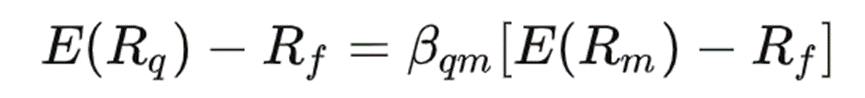

In [96]:
#海康威视分析
#常数值显著大于0，走势明显强于大盘的股票
#投资组合波动比大盘更剧烈

import statsmodels.api as sm
X=cz_1["mkt_flow"]
Y=cz_1["risk_flow"]
# add_constant()函数给原来的特征变量X添加常数项，并赋给X2，这样才有y＝ax＋b中的常数项，即截距b
X2 = sm.add_constant(X)
# 用OLS()和fit()函数对Y和X2进行线性回归方程搭建
est = sm.OLS(Y,X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              risk_flow   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.495e+12
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:46:35   Log-Likelihood:                 12735.
No. Observations:                1459   AIC:                        -2.547e+04
Df Residuals:                    1457   BIC:                        -2.546e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.914e-07   1.03e-06      0.381      0.703   -1.62e-06    2.41e-06
mkt_flow       1.0000   4.27e-07   2.34e+06      0.000       1.000       1.000
==============================================================================
Omnibus:                      113.029   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.864
Skew:                           0.014   Prob(JB):                    1.23e-131
Kurtosis:                       6.149   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
gegu(s002415)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              risk_flow   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     865.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          9.94e-150
Time:                        15:47:17   Log-Likelihood:                -3013.8
No. Observations:                1460   AIC:                             6032.
Df Residuals:                    1458   BIC:                             6042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1028      0.050      2.060      0.040       0.005       0.201
mkt_flow       1.2973      0.044     29.419      0.000       1.211       1.384
==============================================================================
Omnibus:                      138.397   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.844
Skew:                           0.437   Prob(JB):                    5.72e-103
Kurtosis:                       5.641   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#成长2-立讯精密
#常数值显著大于0，走势明显强于大盘的股票
#投资组合波动比大盘更剧烈
gegu(s002475)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              risk_flow   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     544.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.62e-102
Time:                        14:40:28   Log-Likelihood:                -3329.5
No. Observations:                1460   AIC:                             6663.
Df Residuals:                    1458   BIC:                             6674.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1590      0.062      2.565      0.010       0.037       0.281
mkt_flow       1.2768      0.055     23.324      0.000       1.169       1.384
==============================================================================
Omnibus:                       24.978   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.726
Skew:                           0.130   Prob(JB):                     1.43e-09
Kurtosis:                       3.776   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#成长3-隆基绿能
#常数值显著大于0，走势明显强于大盘的股票
#投资组合波动比大盘更剧烈
gegu(s601012)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              risk_flow   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     441.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           9.34e-86
Time:                        14:40:28   Log-Likelihood:                -3458.0
No. Observations:                1460   AIC:                             6920.
Df Residuals:                    1458   BIC:                             6931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2153      0.068      3.180      0.002       0.082       0.348
mkt_flow       1.2553      0.060     21.000      0.000       1.138       1.373
==============================================================================
Omnibus:                       97.347   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.099
Skew:                           0.295   Prob(JB):                     2.51e-66
Kurtosis:                       5.149   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#稳定1-上海机场
#常数值不显著大于0，走势不明显强于大盘的股票
#β小于1，投资组合波动比大盘更平稳
gegu(s600009)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              risk_flow   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     332.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.82e-67
Time:                        14:40:29   Log-Likelihood:                -2988.6
No. Observations:                1460   AIC:                             5981.
Df Residuals:                    1458   BIC:                             5992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0416      0.049      0.847      0.397      -0.055       0.138
mkt_flow       0.7900      0.043     18.229      0.000       0.705       0.875
==============================================================================
Omnibus:                      146.076   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.026
Skew:                           0.228   Prob(JB):                    4.00e-193
Kurtosis:                       6.789   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#稳定2-中国中铁
#常数值不显著大于0，走势不明显强于大盘的股票
#β小于1，投资组合波动比大盘更平稳
gegu(s601390)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              risk_flow   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     791.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.98e-139
Time:                        14:40:29   Log-Likelihood:                -2510.4
No. Observations:                1460   AIC:                             5025.
Df Residuals:                    1458   BIC:                             5035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0334      0.035     -0.944      0.345      -0.103       0.036
mkt_flow       0.8786      0.031     28.128      0.000       0.817       0.940
==============================================================================
Omnibus:                      516.378   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5633.694
Skew:                           1.325   Prob(JB):                         0.00
Kurtosis:                      12.251   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#稳定3-中国建筑
#常数值不显著大于0，走势不明显强于大盘的股票
#β小于1，投资组合波动比大盘更平稳
gegu(s601668)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              risk_flow   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     848.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.84e-147
Time:                        14:40:29   Log-Likelihood:                -2517.9
No. Observations:                1460   AIC:                             5040.
Df Residuals:                    1458   BIC:                             5050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.036      0.529      0.597      -0.051       0.089
mkt_flow       0.9148      0.031     29.136      0.000       0.853       0.976
==============================================================================
Omnibus:                      481.192   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3766.485
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                      10.416   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#组合验证
pd.concat([s002415.dropna(),s002475.dropna(),s601012.dropna(),s600009.dropna(),s601390.dropna(),s601668.dropna()],axis=1)

,002415_price,002415_r,002475_price,002475_r,601012_price,601012_r,600009_price,600009_r,601390_price,601390_r,601668_price,601668_r
日期,,,,,,,,,,,,
2016-01-04,31.24,-9.1596,29.80,-6.7293,12.36,-9.4505,28.27,-4.2344,9.90,-9.3407,6.01,-5.2050
2016-01-05,32.42,3.7772,30.40,2.0134,11.88,-3.8835,28.76,1.7333,9.73,-1.7172,6.03,0.3328
2016-01-06,32.53,0.3393,30.89,1.6118,12.12,2.0202,29.50,2.5730,9.97,2.4666,6.21,2.9851
2016-01-07,30.01,-7.7467,28.60,-7.4134,11.38,-6.1056,27.99,-5.1186,9.22,-7.5226,5.79,-6.7633
2016-01-08,30.96,3.1656,29.06,1.6084,12.41,9.0510,28.03,0.1429,9.30,0.8677,5.90,1.8998
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-29,31.64,4.1818,31.35,2.0176,44.96,0.8298,55.53,3.9888,5.94,3.3043,5.88,4.2553
2022-11-30,31.51,-0.4109,30.91,-1.4035,45.78,1.8238,55.48,-0.0900,5.88,-1.0101,5.88,0.0000
2022-12-01,32.05,1.7137,31.05,0.4529,47.01,2.6868,54.25,-2.2170,5.80,-1.3605,5.74,-2.3810


In [69]:
st2022=pd.concat([s002415,s002475,s601012,s600009,s601390,s601668],axis=1).dropna().iloc[1460:,:]

In [75]:
st2022.iloc[0:2,:].to_clipboard()

In [68]:
pd.read_clipboard()

,日期,002415_price,002415_r,002475_price,002475_r,601012_price,601012_r,600009_price,600009_r,601390_price,601390_r,601668_price,601668_r
0,2022/1/4,52.41,0.1720,51.00,3.6585,84.86,-1.5545,48.52,3.9195,5.82,0.5181,5.03,0.6000
1,2022/1/5,51.33,-2.0607,48.21,-5.4706,81.47,-3.9948,48.84,0.6595,5.77,-0.8591,5.02,-0.1988
2,2022/1/6,49.97,-2.6495,46.85,-2.8210,80.55,-1.1293,49.00,0.3276,5.98,3.6395,5.13,2.1912
3,2022/1/7,49.87,-0.2001,46.61,-0.5123,80.27,-0.3476,49.99,2.0204,6.25,4.5151,5.24,2.1442
4,2022/1/10,50.28,0.8221,48.60,4.2695,79.70,-0.7101,49.99,0.0000,6.35,1.6000,5.37,2.4809
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022/11/28,30.37,-1.7152,30.73,-2.1026,44.59,-2.4929,53.40,3.2682,5.75,-1.3722,5.64,-1.7422
218,2022/11/29,31.64,4.1818,31.35,2.0176,44.96,0.8298,55.53,3.9888,5.94,3.3043,5.88,4.2553
219,2022/11/30,31.51,-0.4109,30.91,-1.4035,45.78,1.8238,55.48,-0.0900,5.88,-1.0101,5.88,0.0000
220,2022/12/1,32.05,1.7137,31.05,0.4529,47.01,2.6868,54.25,-2.2170,5.80,-1.3605,5.74,-2.3810


In [51]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# plt.figure(figsize=(20, 10), dpi=100)
# plt.rcParams['font.family'] = 'SimHei'
# x = df["日期"]
# year5 = df["5年"]
# year1 = df["1年"]
# year3m = df["3月"]
# ticker_spacing = 15
# fig,ax = plt.subplots(1,1)
# ax.plot(x,year5)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
# # 下面的rotation表示的是旋转角度
# plt.xticks(rotation = 45)
# plt.xlabel('Date')
# plt.ylabel('5-Year China national bond rate')
# plt.grid()
# plt.show()

# # plt.plot(game, year5, c='red', label="5-Year China national bond rate")
# # plt.plot(game, year1, c='green', linestyle='--', label="1-Year China national bond rate")
# # plt.plot(game, year3m, c='blue', linestyle='-.', label="3-month China national bond rate")

# # plt.legend(loc='best')

# # plt.grid(True, linestyle='--', alpha=0.5)
# # plt.xlabel("Date", fontdict={'size': 16})
# # plt.ylabel("Return", fontdict={'size': 16})
# # plt.title("China national bond return rate", fontdict={'size': 20})
# # plt.show()

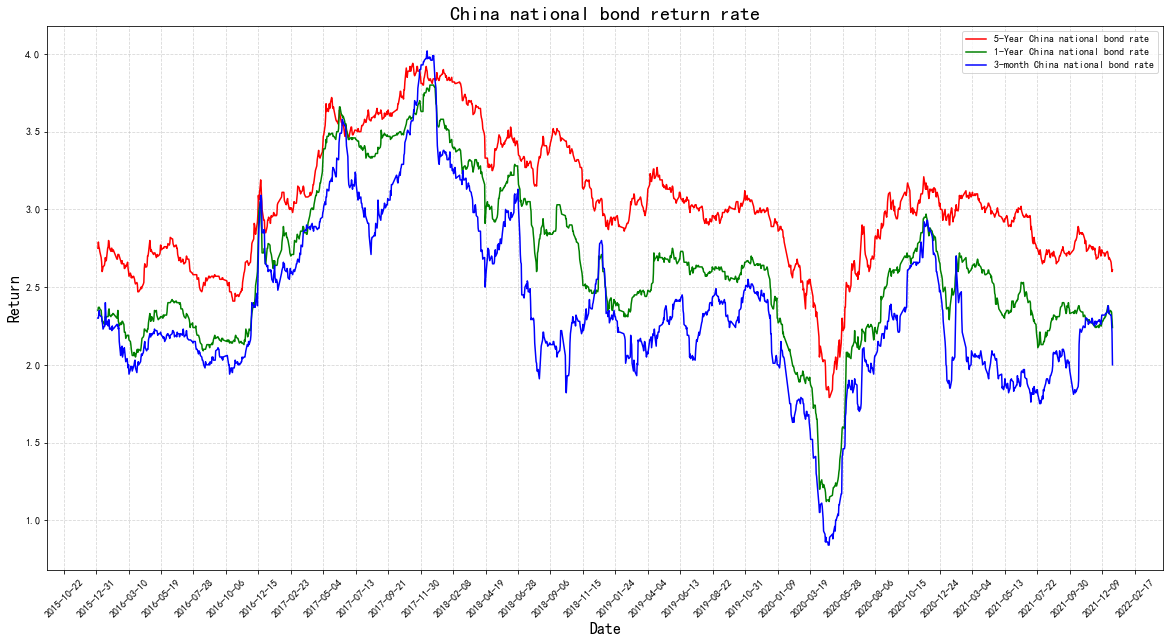

In [52]:
#by fog
# # encoding = utf - 8
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#文字显示乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x = df["日期"]
year5 = df["5年"]
year1 = df["1年"]
year3m = df["3月"]
#根据ticker的功能改变第一个为初始的数据，第二个则为距离
ticker_spacing = x
ticker_spacing = 70

#创建画布
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x,year5,c='red', label="5-Year China national bond rate")
ax.plot(x,year1, c='green',  label="1-Year China national bond rate")
ax.plot(x,year3m,c='blue', label="3-month China national bond rate")
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.xticks(rotation = 45)

plt.legend(loc='best')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Date", fontdict={'size': 16})
plt.ylabel("Return", fontdict={'size': 16})
plt.title("China national bond return rate", fontdict={'size': 20})
plt.show()
